In [1]:
# importing the bunch of libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten,Dropout
from keras.layers import MaxPooling2D

In [2]:
# defining the model
def MakeModel():
    model=Sequential()

    model.add(Conv2D(32,(3,3),input_shape=(200,200,3),padding="same",activation='relu',kernel_initializer='he_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64,(3,3),padding="same",activation='relu',kernel_initializer='he_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64,(3,3),padding="same",activation='relu',kernel_initializer='he_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # flatten
    model.add(Flatten())
    model.add(Dropout(0.3))
    # fully connected layers
    model.add(Dense(units=128,activation='relu'))
    model.add(Dense(units=2,activation='softmax'))
    
    return model
    
model = MakeModel()
print(model.summary())
# compilation of the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 40000)             0

In [3]:
# fittig the above model to the images
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.3,
                                   zoom_range = 0.3,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (200,200),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('data/val',
                                            target_size = (200,200),
                                            batch_size = 16,
                                            class_mode = 'categorical')

hist = model.fit_generator(training_set, 
                         steps_per_epoch = 180,
                         epochs = 20,
                         validation_data = test_set,
                         validation_steps = 36)

Found 6000 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
180/180 [==============================] - 55s 306ms/step - loss: 0.9312 - accuracy: 0.5576 - val_loss: 0.6676 - val_accuracy: 0.5399
Epoch 2/20
180/180 [==============================] - 57s 318ms/step - loss: 0.6512 - accuracy: 0.6241 - val_loss: 0.6677 - val_accuracy: 0.5885
Epoch 3/20
180/180 [==============================] - 59s 329ms/step - loss: 0.6381 - accuracy: 0.6420 - val_loss: 0.6030 - val_accuracy: 0.6580
Epoch 4/20
180/180 [==============================] - 58s 324ms/step - loss: 0.6078 - accuracy: 0.6701 - val_loss: 0.5552 - val_accuracy: 0.6997
Epoch 5/20
180/180 [==============================] - 59s 329ms/step - loss: 0.5880 - accuracy: 0.6800 - val_loss: 0.5317 - val_accuracy: 0.7274
Epoch 6/20
180/180 [==============================] - 60s 334ms/step - loss: 0.5553 - accuracy: 0.7123 - val_loss: 0

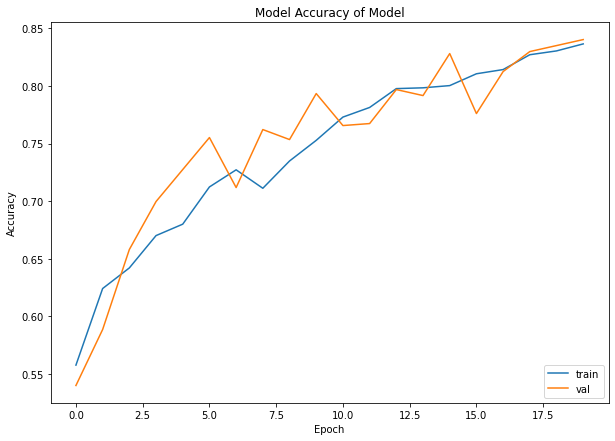

In [5]:
# plotting the figure for accuracy
plt.figure(figsize=(10,7))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy of Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

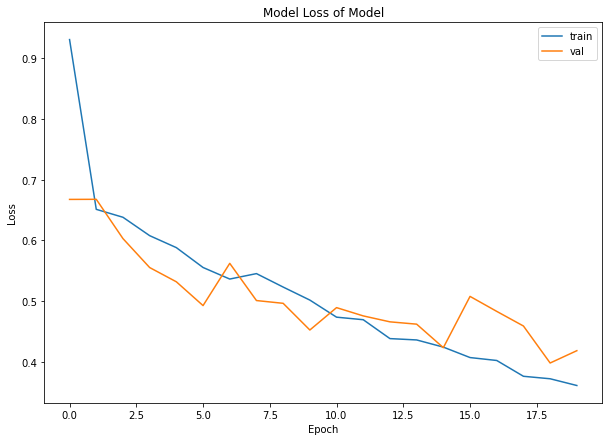

In [6]:
# plotting the figure for loss
plt.figure(figsize=(10,7))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss of Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()